In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os import listdir
from matplotlib import rcParams
rcParams['font.family'] = ['serif']
rcParams['font.serif'] = ['Times New Roman']
rcParams['font.size'] = 16


In [2]:
def read_results(filename:str):
    file = open(filename)
    params = file.readlines()
    projectionErr = float(params[1])
    distanceErr = float(params[2])
    reprojErr = float(params[3])

    return (projectionErr, distanceErr, reprojErr)

In [10]:
prefix_path_base = "base/"
prefix_path_eda = "EDA/"
prefix_path_ransac = "RANSAC/"

pe_base, de_base, re_base = [], [], []
pe_eda, de_eda, re_eda = [], [], []
pe_ransac, de_ransac, re_ransac = [], [], []

available = [1,2,5,6,7,9,11,12,13,14]
for f in available:
    filename = prefix_path_base + "calibration" + f"{f}" + ".txt"
    result = list(read_results(filename))
    pe_base.append(result[0])
    de_base.append(result[1])
    re_base.append(result[2])

for f in available:
    filename = prefix_path_ransac + "calibration" + f"{f}" + ".txt"
    result = list(read_results(filename))
    pe_ransac.append(result[0])
    de_ransac.append(result[1])
    re_ransac.append(result[2])

for f in available[:-5]:
    filename = prefix_path_eda + "calibration" + f"{f}" + ".txt"
    result = list(read_results(filename))
    pe_eda.append(result[0])
    de_eda.append(result[1])
    re_eda.append(result[2])
for i in range(5):
    pe_eda.append(0.0)
    de_eda.append(0.0)
    re_eda.append(0.0)

In [11]:
np.array((pe_base, pe_eda, pe_ransac)).T

array([[11.80965195, 11.72374455, 11.80965195],
       [ 4.63839522,  4.63146177,  4.63839522],
       [11.39690247, 11.40735257, 11.39690247],
       [47.19916631, 47.2392322 , 47.19916631],
       [ 4.83771106,  4.83684597,  4.83771106],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

In [17]:
df_pe = pd.DataFrame(np.array([available, pe_base, pe_eda, pe_ransac]).T, columns=["id","base", "eda", "ransac"])
df_de = pd.DataFrame(np.array([available, de_base, de_eda, de_ransac]).T, columns=["id", "base", "eda", "ransac"])
df_re = pd.DataFrame(np.array([available, re_base, re_eda, re_ransac]).T, columns=["id", "base", "eda", "ransac"])

df_pe['id'] = df_pe['id'].astype(int)
df_de['id'] = df_pe['id'].astype(int)
df_re['id'] = df_pe['id'].astype(int)

In [18]:
df_pe

,id,base,eda,ransac
0,1,11.809652,11.723745,11.809652
1,2,4.638395,4.631462,4.638395
2,5,11.396902,11.407353,11.396902
3,6,47.199166,47.239232,47.199166
4,7,4.837711,4.836846,4.837711
5,9,0.000000,0.000000,0.000000
6,11,0.000000,0.000000,0.000000
7,12,0.000000,0.000000,0.000000
8,13,0.000000,0.000000,0.000000
9,14,0.000000,0.000000,0.000000


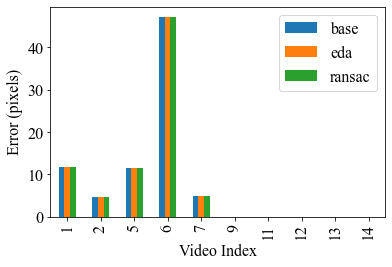

In [36]:
df_pe.plot(kind='bar', x="id")
plt.ylabel("Error (pixels)")
plt.xlabel("Video Index")
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig("../../results/calib_res/proj_err.jpg")

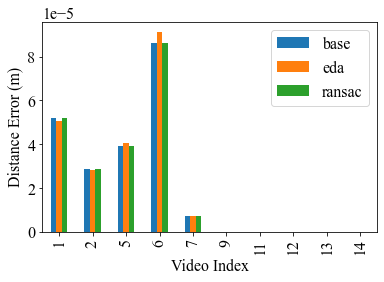

In [35]:

df_de.plot(kind='bar', x="id")
plt.ylabel("Distance Error (m)")
plt.xlabel("Video Index")
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig("../../results/calib_res/dist_err.jpg")

<AxesSubplot:xlabel='id'>

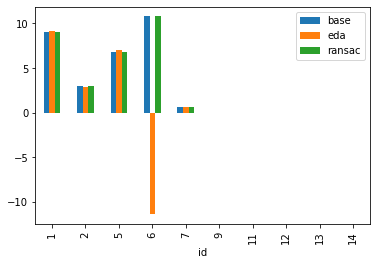

In [22]:
df_re.plot(kind='bar', x="id")